# Olympic Hero

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("olympic.csv")

In [3]:
data.columns

Index(['Country_Name', '# Summer', 'Gold_Summer', 'Silver_Summer',
       'Bronze_Summer', 'Total_Summer', '# Winter', 'Gold_Winter',
       'Silver_Winter', 'Bronze_Winter', 'Total_Winter', '# Games',
       'Gold_Total', 'Silver_Total', 'Bronze_Total', 'Total'],
      dtype='object')

In [4]:
data.rename({"Total": "Total_Medals"}, inplace=True, axis=1)

In [5]:
data.columns

Index(['Country_Name', '# Summer', 'Gold_Summer', 'Silver_Summer',
       'Bronze_Summer', 'Total_Summer', '# Winter', 'Gold_Winter',
       'Silver_Winter', 'Bronze_Winter', 'Total_Winter', '# Games',
       'Gold_Total', 'Silver_Total', 'Bronze_Total', 'Total_Medals'],
      dtype='object')

In [6]:
data.head(n=10)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1


In [7]:
conditions = [
    data.Total_Summer > data.Total_Winter,
    data.Total_Winter > data.Total_Summer,
    data.Total_Summer == data.Total_Winter
]
choices = ["Summer", "Winter", "Both"]

data["Better_Event"] = np.select(conditions, choices)

In [8]:
maximum = 0
better_event = None
for k, v in data.Better_Event.value_counts().to_dict().items():
    if v > maximum:
        maximum = v
        better_event = k

In [9]:
better_event

'Summer'

In [10]:
top_countries = data[['Country_Name','Total_Summer', 'Total_Winter','Total_Medals']]

In [11]:
top_countries.head()

,Country_Name,Total_Summer,Total_Winter,Total_Medals
0,Afghanistan,2,0,2
1,Algeria,15,0,15
2,Argentina,70,0,70
3,Armenia,12,0,12
4,Australasia,12,0,12


In [12]:
top_countries.drop(len(top_countries)-1, axis=0, inplace=True)

/Users/susmitvengurlekar/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
top_countries.tail()

,Country_Name,Total_Summer,Total_Winter,Total_Medals
141,Yugoslavia,83,4,87
142,Independent Olympic Participants,3,0,3
143,Zambia,2,0,2
144,Zimbabwe,8,0,8
145,Mixed team,17,0,17


In [14]:
def top_ten(df, cn):
    country_list = []
    df = df.nlargest(10, cn)
    country_list = list(df.Country_Name)
    return country_list
    

In [15]:
top_10_summer, top_10_winter, top_10 = top_ten(top_countries, "Total_Summer"), top_ten(top_countries, "Total_Winter"), top_ten(top_countries, "Total_Medals")

In [16]:
top_10_summer

['United States',
 'Soviet Union',
 'Great Britain',
 'France',
 'Germany',
 'Italy',
 'Sweden',
 'Hungary',
 'China',
 'Australia']

### Common countries in the three lists

In [17]:
common = list(set(top_10_summer)
              .intersection(set(top_10_winter))
              .intersection(top_10))

In [18]:
common

['United States', 'Soviet Union', 'Germany', 'Sweden']

In [19]:
summer_df = data[data.Country_Name.isin(top_10_summer)]
winter_df = data[data.Country_Name.isin(top_10_winter)]
top_df = data[data.Country_Name.isin(top_10)]

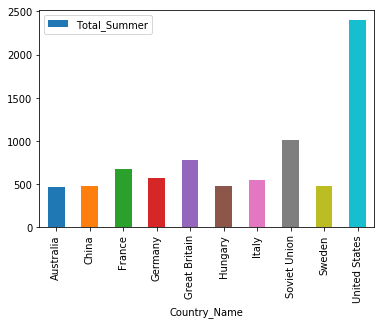

In [20]:
summer_df.plot(kind="bar", x="Country_Name", y="Total_Summer")

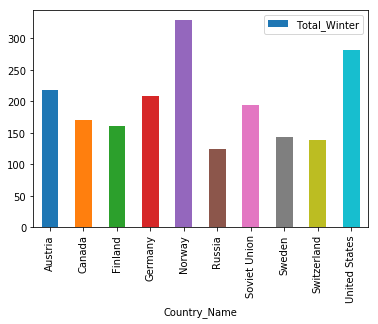

In [21]:
winter_df.plot(kind="bar", x="Country_Name", y="Total_Winter")

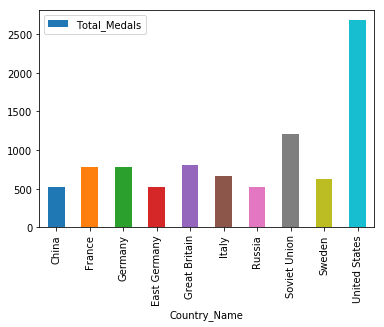

In [22]:
top_df.plot(kind="bar", x="Country_Name", y="Total_Medals")

In [23]:
summer_df["Golden_Ratio"] = summer_df.Gold_Summer / summer_df.Total_Summer
winter_df["Golden_Ratio"] = winter_df.Gold_Winter / winter_df.Total_Winter
top_df["Golden_Ratio"] = top_df.Gold_Total / top_df.Total_Medals

/Users/susmitvengurlekar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/susmitvengurlekar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/susmitvengurlekar/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

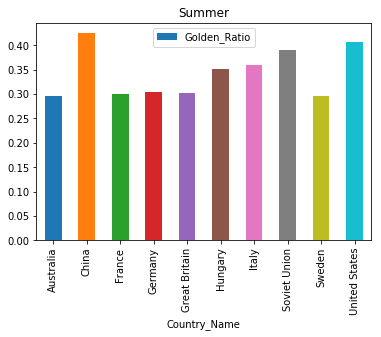

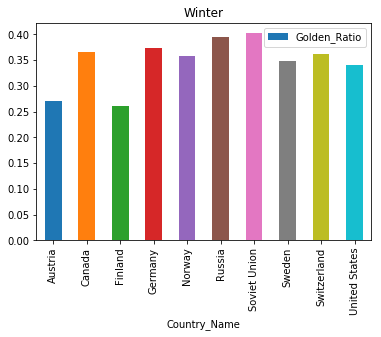

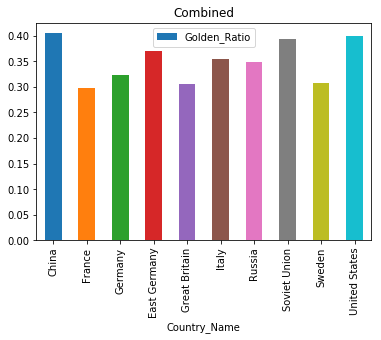

In [24]:
summer_df.plot(kind="bar", x="Country_Name", y="Golden_Ratio", title="Summer")
winter_df.plot(kind="bar", x="Country_Name", y="Golden_Ratio", title="Winter")
top_df.plot(kind="bar", x="Country_Name", y="Golden_Ratio", title="Combined")

In [25]:
summer_max_ratio = max(summer_df.Golden_Ratio)


In [26]:
summer_country_gold = summer_df[summer_df.Golden_Ratio == summer_max_ratio].Country_Name.values[0]

In [27]:
summer_country_gold

'China'

In [28]:
winter_max_ratio = max(winter_df.Golden_Ratio)
winter_country_gold = winter_df[winter_df.Golden_Ratio == winter_max_ratio].Country_Name.values[0]

In [29]:
winter_country_gold

'Soviet Union'

In [30]:
top_max_ratio = max(top_df.Golden_Ratio)
top_country_gold = top_df[top_df.Golden_Ratio == top_max_ratio].Country_Name.values[0]

In [31]:
top_country_gold

'China'

In [32]:
data.tail()

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
142,Independent Olympic Participants,1,0,1,2,3,0,0,0,0,0,1,0,1,2,3,Summer
143,Zambia,12,0,1,1,2,0,0,0,0,0,12,0,1,1,2,Summer
144,Zimbabwe,12,3,4,1,8,1,0,0,0,0,13,3,4,1,8,Summer
145,Mixed team,3,8,5,4,17,0,0,0,0,0,3,8,5,4,17,Summer
146,Totals,27,4809,4775,5130,14714,22,959,958,948,2865,49,5768,5733,6078,17579,Summer


In [33]:
data_1 = data.drop(len(data) -1 , axis=0)

In [34]:
data_1

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,Summer
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,Summer
2,Argentina,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,Summer
3,Armenia,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,Summer
4,Australasia,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,Summer
5,Australia,25,139,152,177,468,18,5,3,4,12,43,144,155,181,480,Summer
6,Austria,26,18,33,35,86,22,59,78,81,218,48,77,111,116,304,Winter
7,Azerbaijan,5,6,5,15,26,5,0,0,0,0,10,6,5,15,26,Summer
8,Bahamas,15,5,2,5,12,0,0,0,0,0,15,5,2,5,12,Summer
9,Bahrain,8,0,0,1,1,0,0,0,0,0,8,0,0,1,1,Summer


In [35]:
data_1.columns

Index(['Country_Name', '# Summer', 'Gold_Summer', 'Silver_Summer',
       'Bronze_Summer', 'Total_Summer', '# Winter', 'Gold_Winter',
       'Silver_Winter', 'Bronze_Winter', 'Total_Winter', '# Games',
       'Gold_Total', 'Silver_Total', 'Bronze_Total', 'Total_Medals',
       'Better_Event'],
      dtype='object')

In [36]:
data_1["Total_Points"] = data_1.Gold_Total * 3 + data_1.Silver_Total * 2 + data_1.Bronze_Total

In [37]:
data_1.head(n=2)

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event,Total_Points
0,Afghanistan,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,Summer,2
1,Algeria,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,Summer,27


In [38]:
most_points = max(data_1.Total_Points)

In [39]:
most_points

5684

In [40]:
best_country = data_1[data_1.Total_Points == most_points].Country_Name.values[0]

In [41]:
best_country

'United States'

In [42]:
best = data[data.Country_Name == best_country]

In [43]:
best

,Country_Name,# Summer,Gold_Summer,Silver_Summer,Bronze_Summer,Total_Summer,# Winter,Gold_Winter,Silver_Winter,Bronze_Winter,Total_Winter,# Games,Gold_Total,Silver_Total,Bronze_Total,Total_Medals,Better_Event
135,United States,26,976,757,666,2399,22,96,102,84,282,48,1072,859,750,2681,Summer


In [44]:
best = best[["Gold_Total", "Silver_Total", "Bronze_Total"]]

In [45]:
best

,Gold_Total,Silver_Total,Bronze_Total
135,1072,859,750


(array([0]), <a list of 1 Text xticklabel objects>)

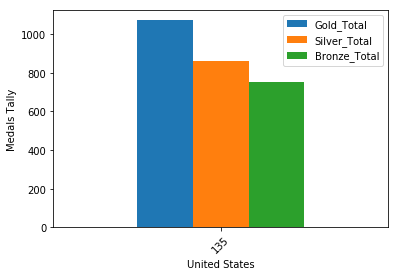

In [159]:
best.plot(kind="bar")
plt.xlabel("United States")
plt.ylabel("Medals Tally")
plt.xticks(rotation=45)

# Complex number calculator


In [2]:
import math

In [67]:
class complex_numbers:
    def __init__(self, real, imag):
        self.real = float(real)
        self.imag = float(imag)
        
    def __repr__(self):
        if self.real == 0.0 and self.imag == 0.0:
            return "0.00"
        if self.real == 0:
            return "%.2fi" % self.imag
        if self.imag == 0:
            return "%.2f" % self.real
        return "%.2f %s %.2fi" % (self.real, "+" if self.imag >= 0 else "-", abs(self.imag))
    
    def __add__ (self, other):
        return complex_numbers(self.real + other.real, self.imag + other.imag)
    
    def __sub__ (self, other):
        return complex_numbers(self.real - other.real, self.imag - other.imag)
    
    def __mul__ (self, other):
        return complex_numbers(self.real * other.real - self.imag * other.imag, self.imag*other.real+self.real*other.imag)
    
    def __truediv__ (self, other):
        ## a/c + bi/c
        c = pow(other.real, 2) + pow(other.imag, 2)
        a = self.real * other.real + self.imag * other.imag
        b = self.imag * other.real - self.real * other.imag
        return complex_numbers(a/c, b/c)
        
        
    
    def absolute(self):
        return math.sqrt(self.real ** 2 + self.imag ** 2)
    
    
    def argument(self):
        return math.degrees(np.arctan(self.imag / self.real))
    
    def conjugate(self):
        return complex_numbers(self.real, self.imag*(-1))
    
        
        
        
    
    

In [62]:
comp_1 = complex_numbers(3,5)
comp_2 = complex_numbers(4,4)

In [66]:
comp_sum = comp_1 + comp_2
comp_diff = comp_1 - comp_2
comp_prod = comp_1 * comp_2
comp_quot = comp_1 / comp_2
comp_abs = comp_1.absolute()
comp_conj = comp_1.conjugate()
comp_arg = comp_1.argument()

# Python Mini Challenges

## Next smallest palindrome

In [90]:
def palindrome(num):
    n = list(str(num))
    l = len(n)
    i = 0;
    j = l - 1;
    
    while (i < j):
        if n[i] < n[j]:
            
        n[j] = n[i]
        i += 1
        j -= 1
    return n
    

In [91]:
palindrome(123)

['1', '2', '1']

### Brute force

In [94]:
def is_palindrome(n):
    rev = int("".join(list(reversed(str(n)))))
    if n == rev:
        return True
    return False

def palindrome(num):
    n = num + 1;
    while not is_palindrome(n):
        n += 1
    return n

In [95]:
palindrome(123)

131

## Anagram Scramble

In [96]:
from collections import Counter

In [121]:
def a_scramble(str_1, str_2):
    s1 = Counter(str_1.lower())
    s2 = Counter(str_2.lower())
    
    if not s2 - s1:
        return True
    return False

In [123]:
a_scramble("Tom Marvolo Riddle","Voldemort")

True

In [124]:
a_scramble("ticket","chat")

False

In [125]:
c - d

Counter({'t': 1, 'i': 1, 'k': 1, 'e': 1})

In [126]:
a-b

Counter({'o': 1, 'm': 1, ' ': 2, 'a': 1, 'r': 1, 'l': 1, 'i': 1, 'd': 1})

In [127]:
if not d-c:
    print("Appear")

In [128]:
d-c

Counter({'h': 1, 'a': 1})

In [129]:
b - a

Counter()

## Fibonacci Check

In [151]:
import math

def is_perfect_square(n):
    s = int(math.sqrt(n))
    return s*s == n

def check_fib(num):
    if is_perfect_square(5*num*num - 4) or is_perfect_square(5*num*num + 4):
        return True
    return False

## Compression

In [186]:
def compress(word):
    word = word.lower()
    ans = ""
    semi_ans = "{}{}"
    l = list(word)
    length = len(l)
    prev = None
    count = 0
    for i in range(length):
        if prev == None:
            prev = word[i]
            count += 1
        elif word[i] == prev:
            count += 1
        elif word[i] != prev:
            ans += semi_ans.format(prev, str(count))
            prev = word[i]
            count = 1
    ans += semi_ans.format(prev, str(count))
        
    return ans
    

In [187]:
compress("Ss")

's2'

## K distinct

In [188]:
from collections import Counter
def k_distinct(string,k):
    c = Counter(string.lower())
    if k == len(c.keys()):
        return True
    return False

In [189]:
a = Counter("Messoptamia".lower())

In [190]:
a

Counter({'m': 2, 'e': 1, 's': 2, 'o': 1, 'p': 1, 't': 1, 'a': 2, 'i': 1})

In [196]:
len(a.keys())


8